In [1]:
%matplotlib inline
import numpy as np
from nicks_plot_utils import Hist1D, Hist2D
import matplotlib.pyplot as plt
import pandas as pd
from lmfit.models import *

In [24]:
mu = 0.0
sigma = 0.2
num = 10_000_000

data = pd.DataFrame({'W' : np.random.normal(mu, sigma, num),
                     'y' : np.random.normal(mu, 0.1, num),
                     'z' : np.random.normal(0.5, 0.5, num)})

data['w_bin'] = pd.cut(data.W, np.linspace(-0.1,0.1,200))
data['w_bin'].unique()

[NaN, (-0.0879, -0.0869], (-0.00151, -0.000503], (-0.0487, -0.0477], (0.0236, 0.0246], ..., (-0.0477, -0.0467], (0.0266, 0.0276], (0.0417, 0.0427], (0.0648, 0.0658], (-0.0628, -0.0618]]
Length: 200
Categories (199, interval[float64]): [(-0.1, -0.099] < (-0.099, -0.098] < (-0.098, -0.097] < (-0.097, -0.096] ... (0.096, 0.097] < (0.097, 0.098] < (0.098, 0.099] < (0.099, 0.1]]

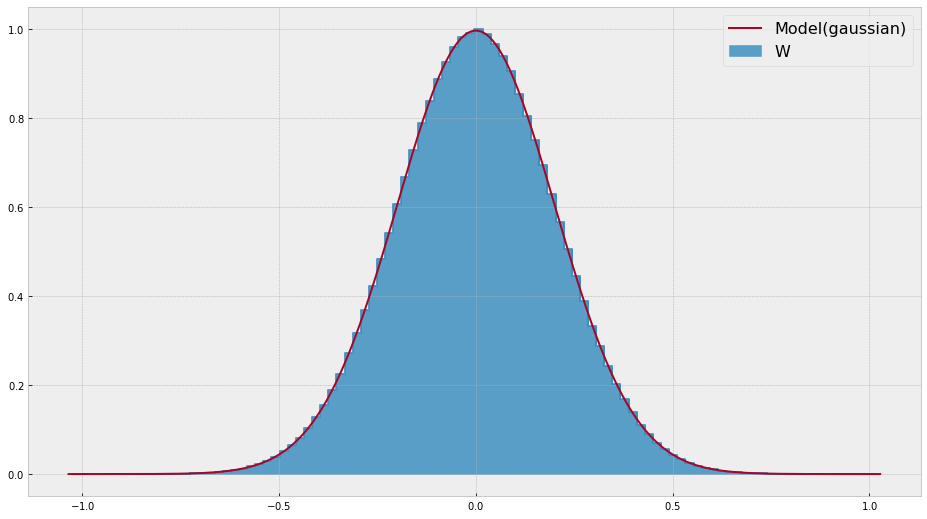

In [3]:
testHist = Hist1D(data=data.W)
testHist.histogram(filled=True)
testHist.fitGaussian()


Need to start with data or set xrange=[left,right]


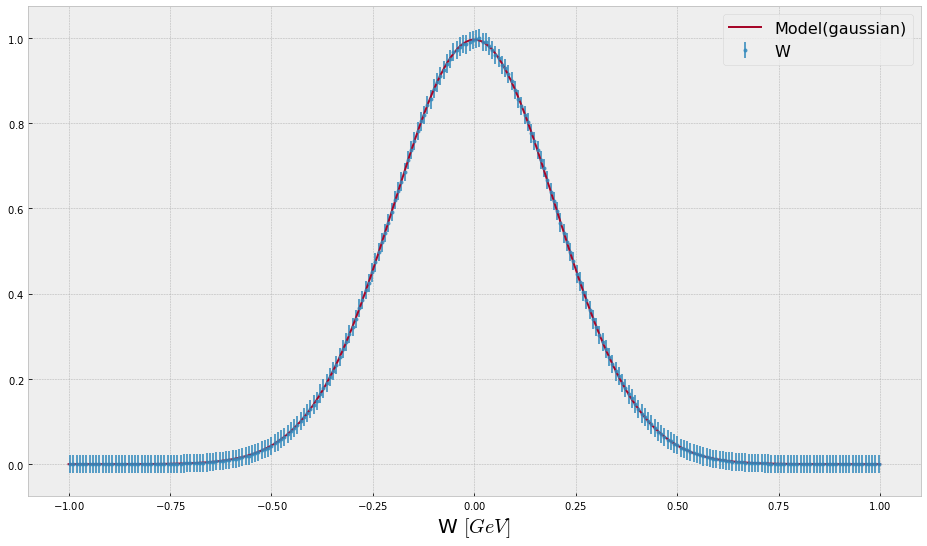

In [4]:
fig, ax = plt.subplots(figsize=(16,9))
testHist = Hist1D(bins=250, name='W $[GeV]$')
testHist.fill(data.W)
testHist.errorbar()
testHist.fitGaussian()

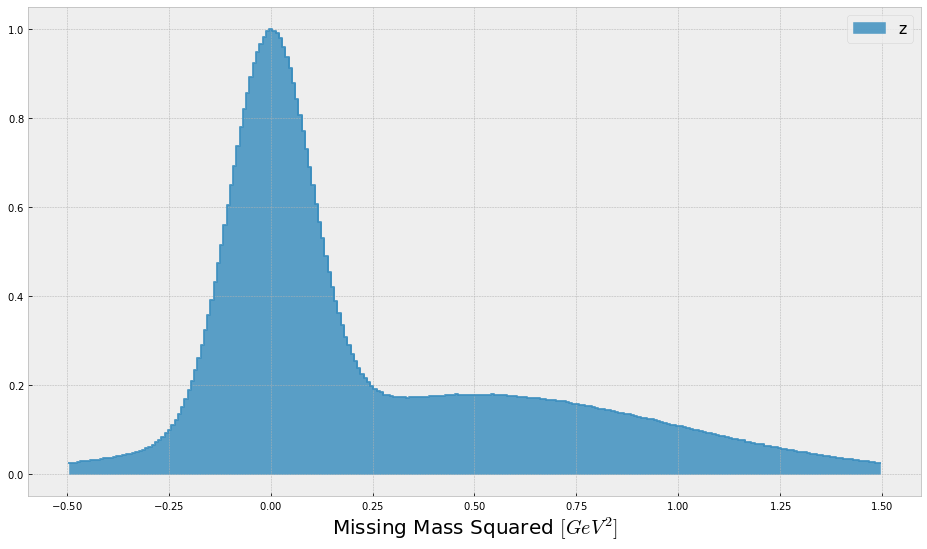

In [5]:
testHist2 = Hist1D(xrange=[-0.5, 1.5], bins=250, name='Missing Mass Squared $[GeV^2]$')
testHist2.fill(data.y)
testHist2.fill(data.z)
testHist2.histogram(filled=True)


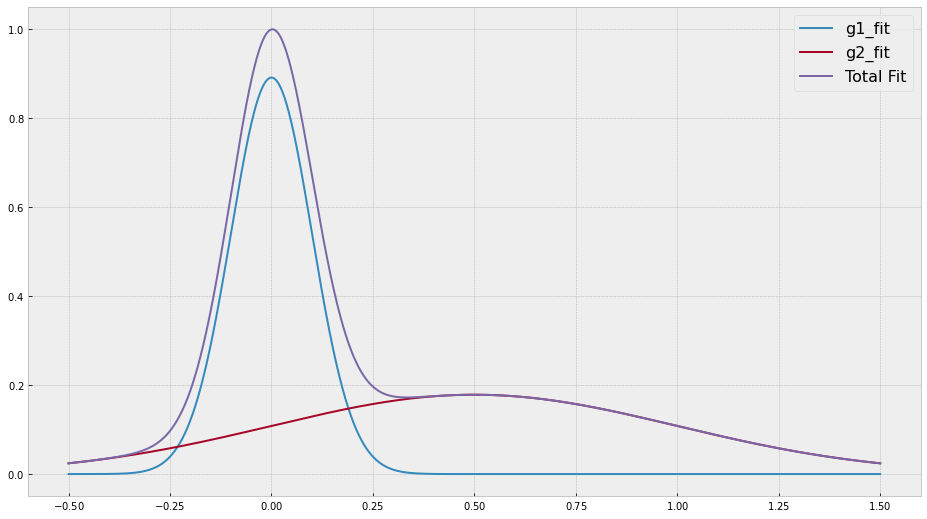

In [6]:
testHist2.histogram(ax, filled=True)

gauss1 = GaussianModel(prefix='g1_')
pars = gauss1.guess(testHist2.y, x=testHist2.x)

pars['g1_center'].set(value=0.0)
pars['g1_sigma'].set(value=0.2)


gauss2 = GaussianModel(prefix='g2_')
pars.update(gauss2.make_params())

pars['g2_center'].set(value=-0.3)
pars['g2_sigma'].set(value=0.5)


mod = gauss1 + gauss2


testHist2.customModel(mod, params=pars)

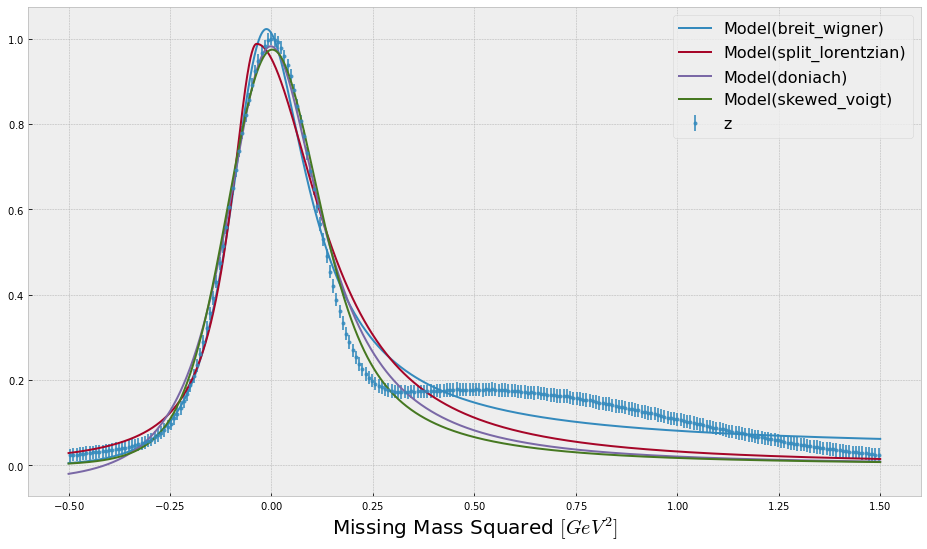

In [9]:
testHist2.errorbar()
testHist2.fitBreitWigner()
testHist2.fitSplitLorentzian()
testHist2.fitDonaich()
out = testHist2.fitSkewedVoigt()

69.24379445695968